# Practice Problems for Data Viz Workshop

This Jupyter notebook contains practice problems that use the `seaborn` and `matplotlib` libraries for Python.

You may also find these resources helpful for future work:

- [seaborn API][sns]
- [matplotlib tutorial][plt]
- [in-depth matplotlib][plt_adv]
- [matplotlib chapter in the Python Data Science Handbook][plt_book]
- [Data Viz chapter in Principles and Techniques of Data Science][ds_book]

[sns]: https://seaborn.pydata.org/api.html
[plt]: http://www.ds100.org/sp18/assets/lectures/lec07/07-intro-matplotlib.html
[plt_adv]: http://www.ds100.org/sp18/assets/lectures/lec07/07-matplotlib_beyond_basics.html
[plt_book]: https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html
[ds_book]: https://www.textbook.ds100.org/ch/06/viz_intro.html

In [43]:
# First, run this cell to import libraries used for this workshop
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [44]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

Next, run the cells below to load two DataFrames we'll be analyzing. This dataset contains information on bike rides in Washington D.C. from a bike-sharing company.

The `bike` DataFrame contains hourly recordings of number of riders and weather attributes. Some riders are registered: they pay a membership fee to the company to use the bikes regularly. Other riders are casual and buy a bike trip on a one-off basis.

Here is a full data dictionary for the `bike` DataFrame:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered  

In [45]:
bike = pd.read_csv('data/bike.csv', parse_dates=['dteday'])
df_interact(bike) # use sliders to examine data columns and values

interactive(children=(IntSlider(value=0, description='row', max=17379, step=7), IntSlider(value=0, description…

(17379 rows, 17 columns) total


The `daily_counts` DataFrame contains the number of casual and registered users aggregated for each day in the data.

In [11]:
daily_counts = pd.read_csv('data/daily_counts.csv')
daily_counts

,casual,registered,workingday
0,331,654,no
1,131,670,no
2,120,1229,yes
...,...,...,...
728,159,1182,no
729,364,1432,no
730,439,2290,yes


## Question 1: Basic seaborn usage

All exercises in Question 1 should be completed with a single call to a `seaborn` plotting function using the `bike` DataFrame (not `daily_counts`).

For this question you will have to consult the [`seaborn` API](https://seaborn.pydata.org/api.html). You may also find the [`seaborn` Tutorial](https://seaborn.pydata.org/tutorial.html) helpful.

### Question 1a

Plot the distribution of bike rider counts. Your plot should look like:

<img src='images/all_cnt.png' width="400px" />

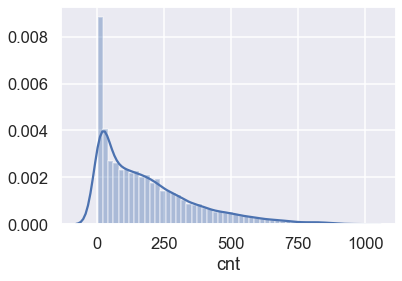

In [51]:
# BEGIN SOLUTION
sns.distplot(bike['cnt']);
plt.savefig("images/all_cnt.png", bbox_inches='tight', dpi=300);
# END SOLUTION

### Question 1b

Make a barplot where the x-axis are the four types of weather conditions (`weathersit`) and each bar height is the average number of riders for that weather condition. Include 95% confidence intervals for each bar. Your plot will look like:

<img src='images/bar_weathersit_cnt.png' width="400px" />

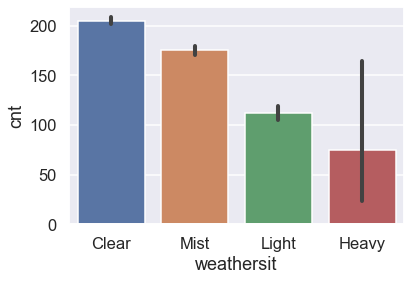

In [54]:
# BEGIN SOLUTION
sns.barplot(x='weathersit', y='cnt', data=bike)
plt.savefig("images/bar_weathersit_cnt.png", bbox_inches='tight', dpi=300);
# END SOLUTION

### Question 1c

Recreate the bar plot from the previous question without the confidence intervals.

<img src='images/bar_weathersit_cnt_no_ci.png' width="400px" />

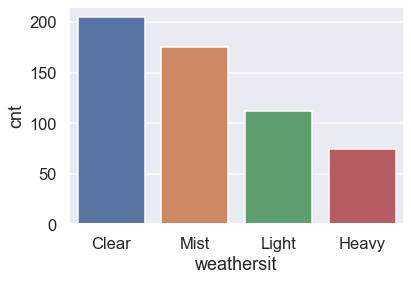

In [55]:
# BEGIN SOLUTION
sns.barplot(x='weathersit', y='cnt', data=bike, ci=False)
plt.savefig("images/bar_weathersit_cnt_no_ci.png", bbox_inches='tight', dpi=300);
# END SOLUTION

### Question 1d

Make a point plot version of the bar plot for Question 1b. Like in 1b, place `weathersit` on the x-axis, `cnt` on the y-axis, and 95% confidence intervals for each point.

<img src='images/point_weathersit_cnt.png' width="400px" />

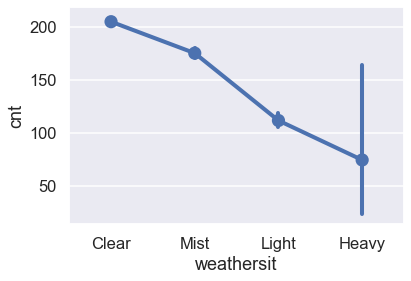

In [56]:
# BEGIN SOLUTION
sns.pointplot(x='weathersit', y='cnt', data=bike)
plt.savefig("images/point_weathersit_cnt.png", bbox_inches='tight', dpi=300);
# END SOLUTION

### Question 1e

Make a box plot, plotting `cnt` on the y-axis and `weathersit` on the x-axis. This is the box plot version of Question 1b.

Examine the bar, point, and box plots. How do these plots display the data differently?

<img src='images/box_weathersit_cnt.png' width="400px" />

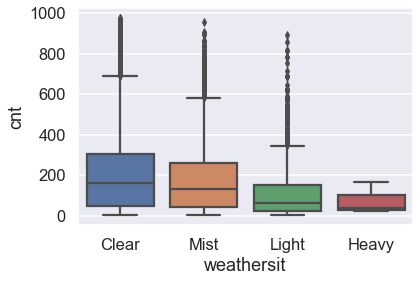

In [58]:
# BEGIN SOLUTION
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.savefig("images/box_weathersit_cnt.png", bbox_inches='tight', dpi=300);
# END SOLUTION

### Question 1f

Make a scatter plot of `cnt` against `temp`.

<img src='images/cnt_temp.png' width="400px" />

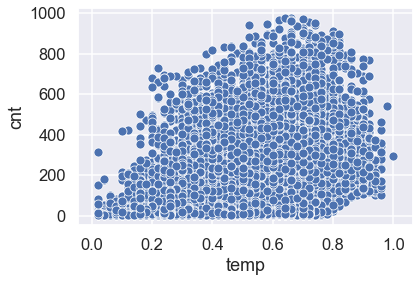

In [59]:
# BEGIN SOLUTION
sns.scatterplot(x='temp', y='cnt', data=bike)
plt.savefig("images/cnt_temp.png", bbox_inches='tight', dpi=300);
# END SOLUTION

### Question 1g

Notice how the points in the scatter plot overlap with each other. Recreate scatter plot using the argument `s=20` to adjust the size of the points. Notice that this argument is not documented in the `seaborn` documentation. This is because the `s` argument is for the underlying `matplotlib` [plotting function](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html).

<img src='images/cnt_temp_20.png' width="400px" />

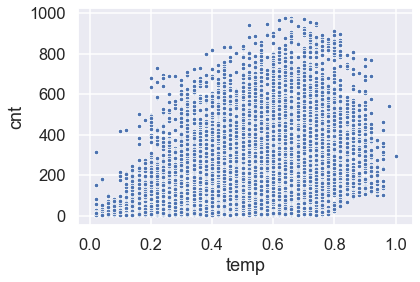

In [67]:
# BEGIN SOLUTION
sns.scatterplot(x='temp', y='cnt', data=bike, s=20)
plt.savefig("images/cnt_temp_20.png", bbox_inches='tight', dpi=300);
# END SOLUTION

### Question 1h

Facet the plot in the previous question by season. Note that if you used `sns.scatterplot` in the previous question, you'll have to use `sns.relplot` for this question.

<img src='images/season_cnt_temp_20.png' />

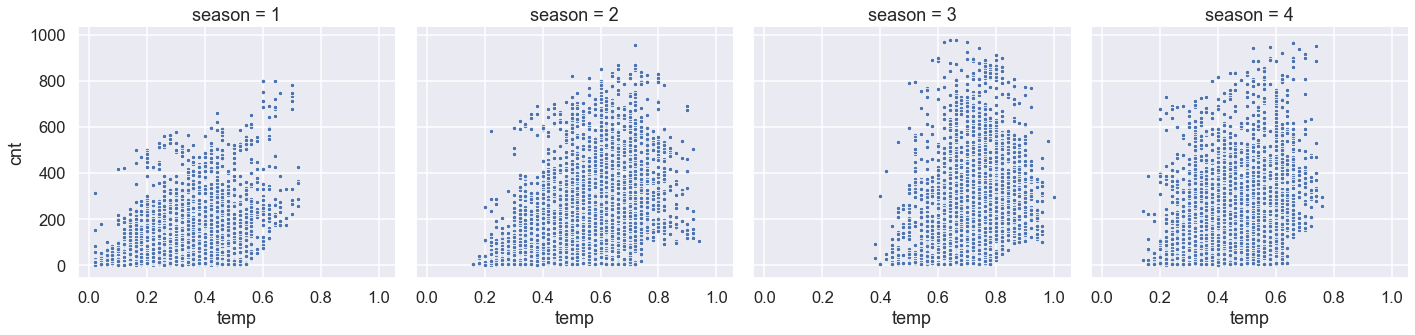

In [66]:
# BEGIN SOLUTION
sns.relplot(x='temp', y='cnt', col='season', data=bike, s=20)
plt.savefig("images/season_cnt_temp_20.png", bbox_inches='tight', dpi=300);
# END SOLUTION

### Question 1h

Facet the plot in the previous question by `workingday` in addition to the season.

<img src='images/season_working_cnt_temp_20.png' />

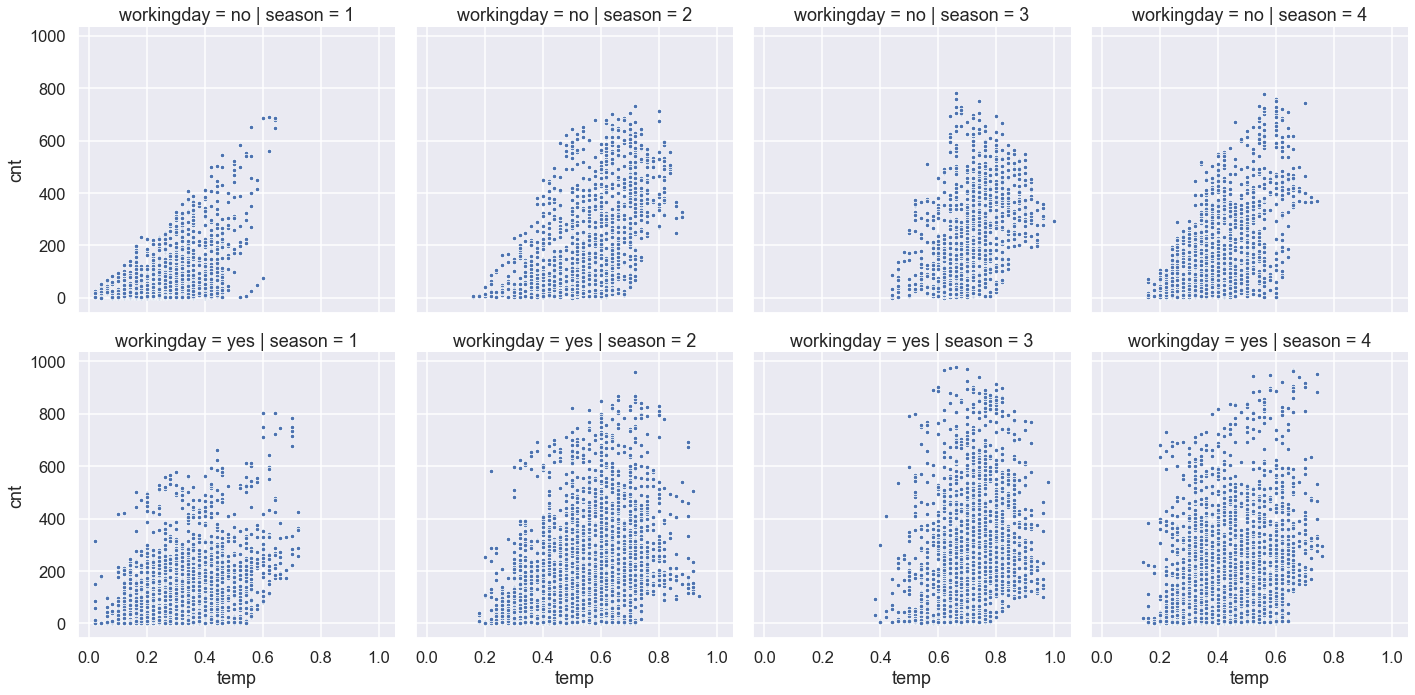

In [68]:
# BEGIN SOLUTION
sns.relplot(x='temp', y='cnt', col='season', row='workingday', data=bike, s=20)
plt.savefig("images/season_working_cnt_temp_20.png", bbox_inches='tight', dpi=300);
# END SOLUTION

## Question 2: Using seaborn with matplotlib

For Question 2, you will use `seaborn` and `matplotlib` together to make publication-ready plots.

### Question 2a

Recreate the following plot using the `daily_counts` DataFrame. It displays the distributions of both casual and registered users. Include a legend, x and y-axis labels, and title.

<img src='images/casual_v_registered.png' width="600px" />

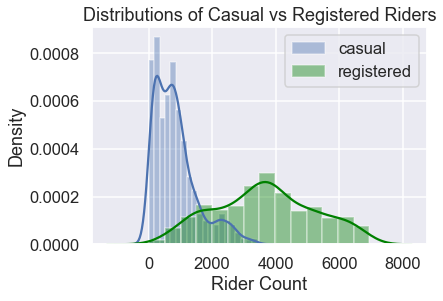

In [71]:
# BEGIN SOLUTION
sns.distplot(daily_counts['casual'], label='casual')
sns.distplot(daily_counts['registered'],  label='registered', color='green')
plt.legend()
plt.title("Distributions of Casual vs Registered Riders")
plt.xlabel("Rider Count")
plt.ylabel("Density");
plt.savefig("images/casual_v_registered.png", bbox_inches='tight', dpi=300);
# END SOLUTION

### Question 2b

The density plots do not show us how the counts for registered and casual riders vary together. Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, use the `bike` DataFrame to plot hourly counts instead of daily counts.

The `lmplot` function will also try to draw a linear regression line. Color the points in the scatterplot according to whether or not the day is working day. There are many points in the scatter plot so make them small to help reduce overplotting. You can set the `height` parameter if you want to adjust the size of the `lmplot`. Make sure to include a title.

<img src='images/casual_registered_working_nonworking.png' width="600px" />

**Hints:** 
* You may find this [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html) helpful.
* You will need to set `x`, `y`, `hue`, and pass in a dictionary to `scatter_kws`.

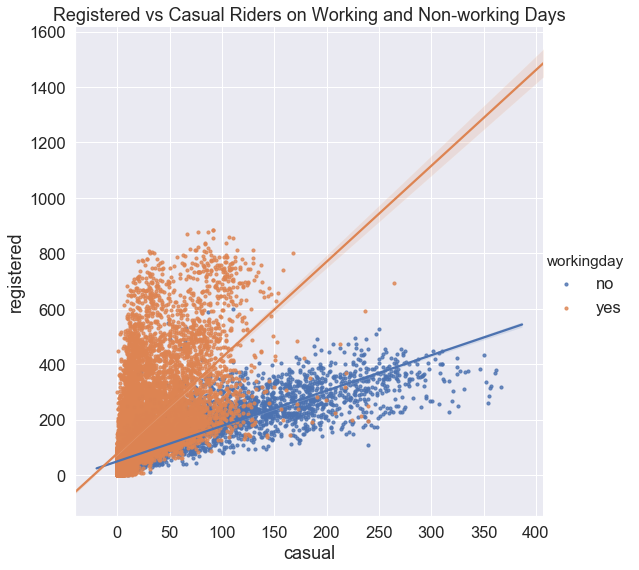

In [74]:
# Make the font size a bit bigger
sns.set(font_scale=1.5)
# BEGIN SOLUTION
sns.lmplot(x="casual", y="registered", hue="workingday",
           data=bike, fit_reg=True, height=8, scatter_kws={"s": 10})
plt.title("Registered vs Casual Riders on Working and Non-working Days");
plt.savefig("images/casual_registered_working_nonworking.png", bbox_inches='tight', dpi=300);
# END SOLUTION

## 4: Joint Plot

As an alternative approach to visualizing the data, construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual riders plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables. Note that this plot makes it harder see the linear relationships between casual and registered for the two different conditions (weekday vs. weekend).

<img src="images/joint_distribution_of_daily_rider_types.png" width="600px" />

**Hints**:
* The [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) has examples that may be helpful.
* Take a look at `sns.jointplot` and its `kind` parameter.
* `set_axis_labels` can be used to rename axes on the contour plot.
* `plt.suptitle` from lab 1 can be handy for setting the title where you want.
* `plt.subplots_adjust(top=0.9)` can help if your title overlaps with your plot

```
BEGIN QUESTION
name: q4
points: 2
manual: true
```

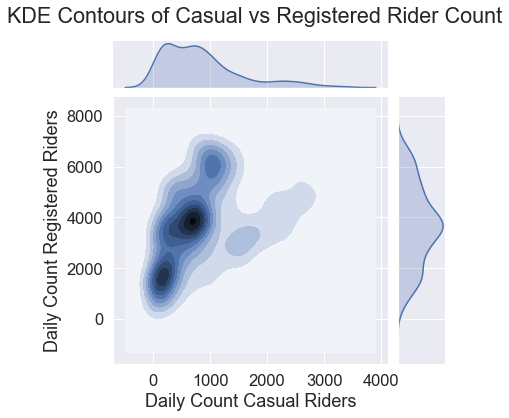

In [31]:
# BEGIN SOLUTION
g = sns.jointplot(x="casual", y="registered", data=daily_counts, kind="kde");
g.set_axis_labels("Daily Count Casual Riders", "Daily Count Registered Riders")
plt.suptitle("KDE Contours of Casual vs Registered Rider Count")
plt.subplots_adjust(top=0.9);
# plt.savefig("images/joint_distribution_of_daily_rider_types.png", bbox_inches='tight', dpi=300);
# END SOLUTION

---
## 5: Understanding Daily Patterns

### Question 5

#### Question 5a
Let's examine the behavior of riders by plotting the average number of riders for each hour of the day over the **entire dataset**, stratified by rider type.  

Your plot should look like the following:

<img src="images/diurnal_bikes.png" width="600px"/>

```
BEGIN QUESTION
name: q5a
points: 2
manual: true
```

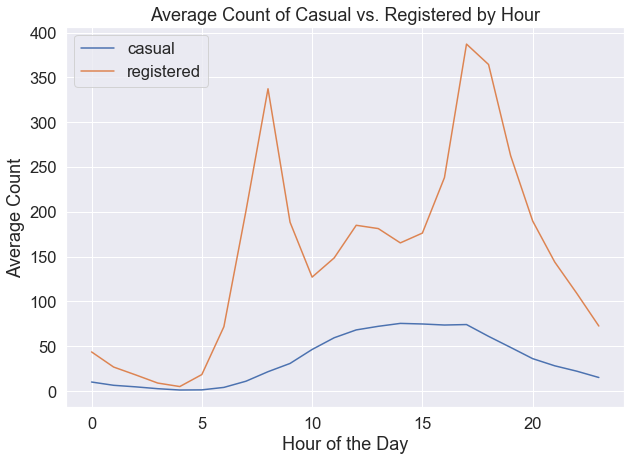

In [32]:
# BEGIN SOLUTION
plt.figure(figsize=(10, 7))
hourly_means = bike.groupby('hr').mean()
sns.lineplot(x = hourly_means.index, y = hourly_means['casual'], label = 'casual')
sns.lineplot(x = hourly_means.index, y = hourly_means['registered'], label = 'registered')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.title('Average Count of Casual vs. Registered by Hour');
# END SOLUTION

#### Question 5b

What can you observe from the plot?  Hypothesize about the meaning of the peaks in the registered riders' distribution.
```
BEGIN QUESTION
name: q5b
points: 2
manual: true
```

**SOLUTION:** In the above plot we see strong evidence of daily patterns in both datasets. The casual riders appear to ride throughout the day with peak hours in the mid-afternoon. Alternatively, while the registered riders also ride more during the day than at night there are very strong spikes during the morning and evening commute hours with a small bump during lunch.

---
## 6: Exploring Ride Sharing and Weather
Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

### Question 6

#### Question 6a
Create a new column `prop_casual` in the `bike` DataFrame representing the proportion of casual riders out of all riders.
```
BEGIN QUESTION
name: q6a
points: 1
```

In [33]:
# BEGIN SOLUTION
bike['prop_casual'] = bike['casual'] / (bike['casual'] + bike['registered'])
# END SOLUTION

In [34]:
# TEST
int(bike["prop_casual"].sum())

2991

In [ ]:
# HIDDEN TEST
np.round(bike["prop_casual"].mean(), 2)

0.17000000000000001

#### Question 6b
In order to examine the relationship between proportion of casual riders and temperature, we can create a scatterplot using `sns.scatterplot`. We can even use color/hue to encode the information about day of week. Run the cell below, and you'll see we end up with a big mess that is impossible to interpret.

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=bike, x="temp", y="prop_casual", hue="weekday");

We could attempt linear regression using `sns.lmplot` as shown below, which hint at some relationships between temperature and proportional casual, but the plot is still fairly unconvincing. 

In [ ]:
sns.lmplot(data=bike, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The red curve shown is a smoothed version of the scatterplot.

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(xobs, yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(xobs, ysmooth, label="Smoothed Estimator", color='red')
plt.legend();

In our case with the bike ridership data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual riders.

<img src="images/curveplot_temp_prop_casual.png" width="600px" />

You should use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. Unlike the example above, plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting. For this problem, the simplest way is to use a loop.

**Hints:** 
* Start by just plotting only one day of the week to make sure you can do that first.

* The `lowess` function expects y coordinate first, then x coordinate.

* Look at the top of this homework notebook for a description of the temperature field to know how to convert to Fahrenheit. By default, the temperature field ranges from 0.0 to 1.0. In case you need it, $\text{Fahrenheit} = \text{Celsius} * \frac{9}{5} + 32$.

Note: If you prefer plotting temperatures in Celsius, that's fine as well!
```
BEGIN QUESTION
name: q6b
points: 4
manual: true
```

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(10,8))
# BEGIN SOLUTION
for day in bike['weekday'].unique():
    this_day = bike[bike['weekday'] == day].copy()
    this_day['temp'] = this_day['temp'] * 41 * 9 / 5 + 32 
    ysmooth = lowess(this_day['prop_casual'], this_day['temp'], return_sorted=False)
    sns.lineplot(this_day['temp'], ysmooth, label=day)

plt.title("Temperature vs Casual Rider Proportion by Weekday")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Casual Rider Proportion")
plt.legend();
# plt.savefig("images/curveplot_temp_prop_casual", bbox_inches='tight', dpi=300);
# END SOLUTION